## Librerie

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report

from keras import models
from keras import layers
from keras import optimizers

## Import Dati

In [20]:
data = pd.read_csv("train.csv")

In [21]:
pd.set_option('display.max_columns', 500)

In [22]:
data = data.rename(columns = {"default.payment.next.month" : "TARGET", "PAY_0": "PAY_1"})

In [23]:
data.isna().sum() 
## NON CI SONO NA

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
TARGET       0
dtype: int64

In [24]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Analisi esplorative

In [25]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,167196.518519,1.603185,1.852444,1.551074,35.466667,-0.017704,-0.131259,-0.164963,-0.218704,-0.265148,-0.289963,51323.763407,49209.214889,4.698653e+04,43268.021926,40306.842667,38901.908259,5689.029370,5.931783e+03,5224.739037,4852.083778,4795.497259,5221.980185,0.221222
std,129337.261882,0.489246,0.789157,0.522311,9.206436,1.125608,1.197965,1.198714,1.171908,1.136924,1.153581,73528.597002,71167.111334,6.929217e+04,64392.383099,60803.533634,59510.024370,16911.464096,2.352149e+04,17786.906985,15978.287986,15043.584614,18069.890373,0.415078
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3600.000000,2986.000000,2.663000e+03,2313.000000,1746.000000,1261.000000,1000.000000,8.345000e+02,390.000000,291.750000,248.750000,106.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22431.000000,21188.500000,2.008800e+04,19067.500000,18118.500000,17137.500000,2100.000000,2.008500e+03,1800.000000,1500.000000,1504.500000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67591.750000,64145.250000,6.022025e+04,54656.750000,50245.500000,49326.250000,5005.000000,5.000000e+03,4500.000000,4006.000000,4036.250000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [26]:
a = data.groupby("TARGET").count()
a = a.reset_index(level=[0])
a = a[["TARGET", "LIMIT_BAL"]]
a.columns = ["TARGET", "COUNT"]

In [27]:
print("Il valore 1 è il " + str(round((a["COUNT"][1]/a["COUNT"][0]) * 100,2)) + "% del valore 0")

Il valore 1 è il 28.41% del valore 0


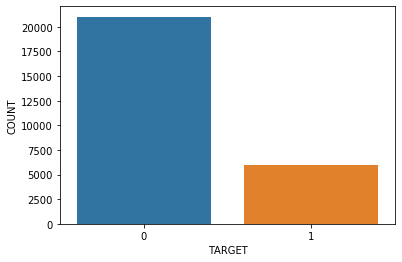

In [28]:
sns.barplot(x = "TARGET", y = "COUNT", data = a)

## Variabile target molto sbilanciata

In [29]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,TARGET
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [30]:
print(data["EDUCATION"].unique())
print(data["MARRIAGE"].unique())
print(data["PAY_1"].unique())

[2 1 3 5 4 6 0]
[1 2 3 0]
[ 2 -1  0 -2  1  3  4  8  7  5  6]


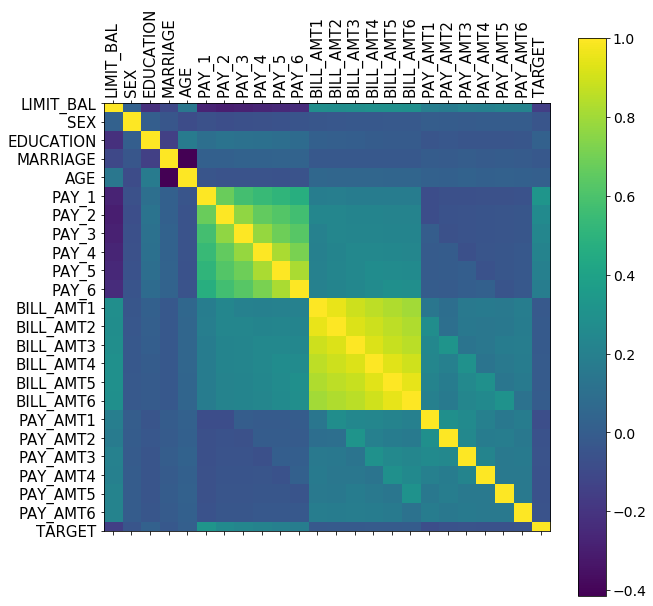

In [31]:
f = plt.figure(figsize=(10, 10))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=15, rotation=90)
plt.yticks(range(data.shape[1]), data.columns, fontsize=15)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

### Forte correlazione tra le variabili BILL_ATM1-6

## PREPROCESSING

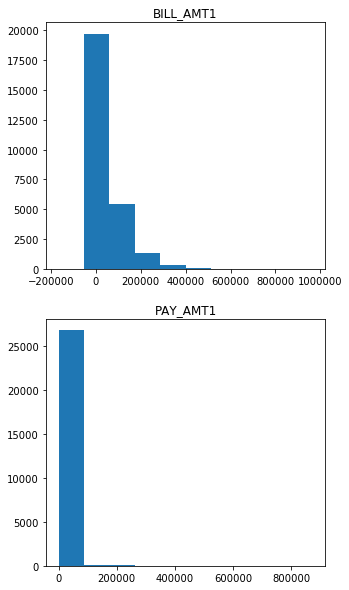

In [32]:
plt.figure(figsize=(5, 10))
plt.subplot(2,1,1)
plt.hist(data["BILL_AMT1"])
plt.title("BILL_AMT1")

plt.subplot(2,1,2)
plt.hist(data["PAY_AMT1"])
plt.title("PAY_AMT1")

plt.show()


## Sbilanciamento variabili, quindi trasf logaritmica

In [33]:
## Cambio in 0 i valori negativi per poter applicare la trasf log
for i in range(1,7):
    data["BILL_AMT" + str(i)][data["BILL_AMT" + str(i)] < 0] = 0

/home/federico/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
## Applico trasf ln(x+1) a BILL_AMT1-6 e PAY_AMT1-6 e LIMIT_BAL

data["LIMIT_BAL"] = np.log(data["LIMIT_BAL"] + 1)
for i in range(1,7):
    data["BILL_AMT" + str(i)] = np.log(data["BILL_AMT" + str(i)] + 1)
    data["PAY_AMT" + str(i)] = np.log(data["PAY_AMT" + str(i)] + 1)

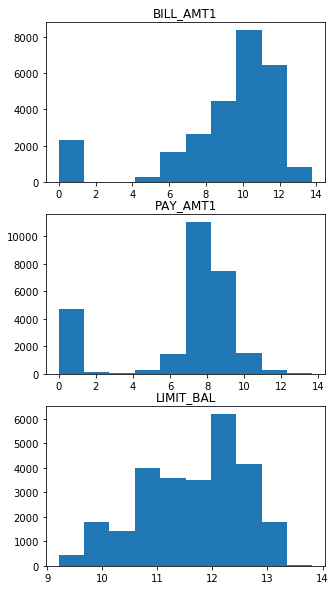

In [35]:
plt.figure(figsize=(5, 10))
plt.subplot(3,1,1)
plt.hist(data["BILL_AMT1"])
plt.title("BILL_AMT1")

plt.subplot(3,1,2)
plt.hist(data["PAY_AMT1"])
plt.title("PAY_AMT1")

plt.subplot(3,1,3)
plt.hist(data["LIMIT_BAL"])
plt.title("LIMIT_BAL")

plt.show()


In [36]:
## Calcolo la media per levare il problema della correlazione
data["AVG_BILL_AMT"] = data[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis = 1)

In [37]:
## sistemo variabile age ed education (1 = scuola secondaria di primo grado; 2 = universita; 
## 3 = scuola secondaria di secondo grado; 0, 4, 5, 6= altri)

age_bin =  pd.get_dummies(pd.cut(data["AGE"], [0, 20,30,40,50,60,70,80, float("inf")]))
age_bin.columns = ["0-20", "21-30", "30-40", "41-50", "51-60", "61-70", "70-80", "80+"]
data = data.join(age_bin)
data["EDUCATION"][data["EDUCATION"]>=4] =0

/home/federico/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


## Split train, test  e downsapling

In [38]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'TARGET',
       'AVG_BILL_AMT', '0-20', '21-30', '30-40', '41-50', '51-60', '61-70',
       '70-80', '80+'],
      dtype='object')

In [39]:
data = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'AVG_BILL_AMT', '0-20', '21-30', '30-40', '41-50', '51-60', '61-70',
       '70-80', '80+', 'TARGET']]

In [40]:
train, test = train_test_split(data, test_size = 0.1, stratify = data["TARGET"], random_state = 123)

In [41]:
train["TARGET"].value_counts()

0    18924
1     5376
Name: TARGET, dtype: int64

In [42]:

df_majority = train[train.TARGET==0]
df_minority = train[train.TARGET==1]
 

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=train["TARGET"].value_counts()[1],     
                                 random_state=123) 
 

train_ds = pd.concat([df_majority_downsampled, df_minority])

train_ds.TARGET.value_counts()

1    5376
0    5376
Name: TARGET, dtype: int64

In [43]:
train_ds = train_ds.sample(frac=1).reset_index(drop=True)

## Rete neurale

In [44]:
X_train, y_train = train_ds[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AVG_BILL_AMT', '0-20', '21-30', '30-40', '41-50', '51-60', '61-70',
       '70-80', '80+']], train_ds["TARGET"]

X_test, y_test = test[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AVG_BILL_AMT', '0-20', '21-30', '30-40', '41-50', '51-60', '61-70',
       '70-80', '80+']], test["TARGET"]


In [45]:
X_train = X_train.as_matrix()
y_train = y_train.values.reshape(10752,1)

X_test = X_test.as_matrix()
y_test = y_test.values.reshape(2700,1)

/home/federico/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/federico/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [48]:
from keras import backend as K
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [168]:
model = models.Sequential()

model.add(layers.Dense(32, input_dim =  25, activation = "relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation="sigmoid"))

In [169]:
model.compile(optimizer = optimizers.adam(), loss="binary_crossentropy", metrics=["acc", f1_m])

In [170]:
history = model.fit(X_train, y_train, 
                    batch_size=128,
                    epochs=10,
                    validation_split=0.3)

Train on 7526 samples, validate on 3226 samples
Epoch 1/10
7526/7526 [==============================] - 3s 423us/step - loss: 0.7765 - acc: 0.5225 - f1_m: 0.5347 - val_loss: 0.6655 - val_acc: 0.6060 - val_f1_m: 0.4954
Epoch 2/10
7526/7526 [==============================] - 2s 324us/step - loss: 0.6842 - acc: 0.5666 - f1_m: 0.5586 - val_loss: 0.6401 - val_acc: 0.6562 - val_f1_m: 0.6009
Epoch 3/10
7526/7526 [==============================] - 1s 186us/step - loss: 0.6568 - acc: 0.6064 - f1_m: 0.5984 - val_loss: 0.6280 - val_acc: 0.6692 - val_f1_m: 0.6248
Epoch 4/10
7526/7526 [==============================] - 2s 255us/step - loss: 0.6356 - acc: 0.6370 - f1_m: 0.6164 - val_loss: 0.6162 - val_acc: 0.6785 - val_f1_m: 0.6364
Epoch 5/10
7526/7526 [==============================] - 1s 99us/step - loss: 0.6311 - acc: 0.6419 - f1_m: 0.6206 - val_loss: 0.6106 - val_acc: 0.6829 - val_f1_m: 0.6459
Epoch 6/10
7526/7526 [==============================] - 1s 81us/step - loss: 0.6250 - acc: 0.6535 - f1_

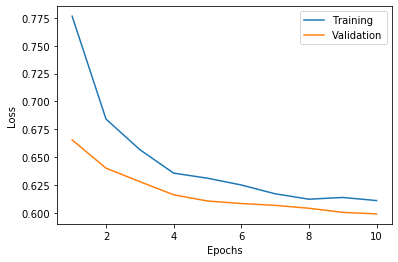

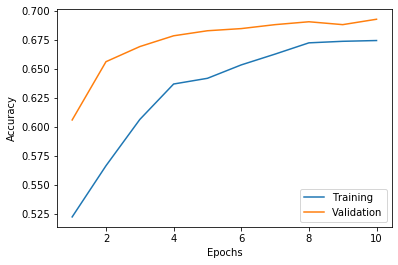

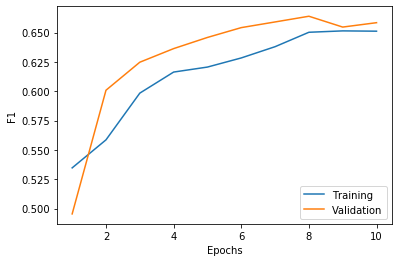

In [171]:
x_plot = list(range(1,history.epoch[-1]+2))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['acc'])
    plt.plot(x_plot, network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('F1')
    plt.plot(x_plot, network_history.history['f1_m'])
    plt.plot(x_plot, network_history.history['val_f1_m'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
plot_history(history)

In [166]:
test_loss, test_acc, F1 = model.evaluate(X_test, y_test, batch_size=128)
print("TEST LOSS:", test_loss)
print("TEST ACCURACY:", test_acc)
print("TEST F1:", F1)

2700/2700 [==============================] - 0s 40us/step
TEST LOSS: 0.5891658786491112
TEST ACCURACY: 0.7529629628746598
TEST F1: 0.5305101363747208


In [173]:
y_test_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.88      0.79      0.83      2103
          1       0.45      0.62      0.52       597

avg / total       0.79      0.75      0.76      2700



## Carico test finale

In [143]:
test_fin = pd.read_csv("/home/federico/Desktop/Università/II_ANNO/Advance_ML/Assignemnet/Assignment_1/test.csv")
test_fin = test_fin.rename(columns = {"default.payment.next.month" : "TARGET", "PAY_0": "PAY_1"})

In [144]:
## Applico le stesse fasi di preprocessing

for i in range(1,7):
    test_fin["BILL_AMT" + str(i)][test_fin["BILL_AMT" + str(i)] < 0] = 0

test_fin["LIMIT_BAL"] = np.log(test_fin["LIMIT_BAL"] + 1)
for i in range(1,7):
    test_fin["BILL_AMT" + str(i)] = np.log(test_fin["BILL_AMT" + str(i)] + 1)
    test_fin["PAY_AMT" + str(i)] = np.log(test_fin["PAY_AMT" + str(i)] + 1)

test_fin["AVG_BILL_AMT"] = test_fin[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6"]].mean(axis = 1)

age_bin =  pd.get_dummies(pd.cut(test_fin["AGE"], [0, 20,30,40,50,60,70,80, float("inf")]))
age_bin.columns = ["0-20", "21-30", "30-40", "41-50", "51-60", "61-70", "70-80", "80+"]
test_fin = test_fin.join(age_bin)
test_fin["EDUCATION"][test_fin["EDUCATION"]>=4] =0


test_fin = test_fin[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'AVG_BILL_AMT', '0-20', '21-30', '30-40', '41-50', '51-60', '61-70',
       '70-80', '80+']]

test_fin = test_fin.as_matrix()

/home/federico/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/federico/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/federico/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [145]:
y_test = model.predict_classes(test_fin)

In [64]:
a = []
for i in y_test:
    a.append(i[0])
with open("Federico_Manenti_790032_score1.txt", "w") as f:
    for i in a:
        f.write("%s\n" % str(i))